In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install geopy

In [1]:
!pip install seaborn

In [2]:
!pip install folium

In [3]:
!pip install shapely
!pip install geopandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
import sqlite3
import folium
from shapely.geometry import Point, Polygon
import geopandas as gpd

In [5]:
# Step 1: Data Collection & Exploration
# Load the hospital data
hospitals_df = pd.read_csv(r"C:\Users\bye\OneDrive - County of San Mateo\Desktop\hospital parity study\OK maternal hospitals 2019.csv")
print("Hospital data shape:", hospitals_df.shape)
print(hospitals_df.head())
print(hospitals_df.info())
print(hospitals_df.describe())
print(hospitals_df.columns)


Hospital data shape: (143, 11)
        ID                                              MNAME       CNTYNAME  \
0  6730001                             Rolling Hills Hospital   Pontotoc, OK   
1  6730005               Southwestern Regional Medical Center      Tulsa, OK   
2  6730009  J. D. McCarty Center for Children With Develop...  Cleveland, OK   
3  6730010                                 Mercy Hospital Ada   Pontotoc, OK   
4  6730012                  Curahealth Hospital Oklahoma City   Oklahoma, OK   

   MCRNUM                    MLOCADDR       MLOCCITY  CNTRL  OBLEV  FCOUNTY  \
0  374016     1000 Rolling Hills Lane            Ada     33      0    40123   
1  370190      10109 East 79th Street          Tulsa     33      0    40143   
2  373300          2002 East Robinson         Norman     12      0    40027   
3  370020       430 North Monte Vista            Ada     21      1    40123   
4  372004  1407 North Robinson Avenue  Oklahoma City     33      0    40109   

       LAT   

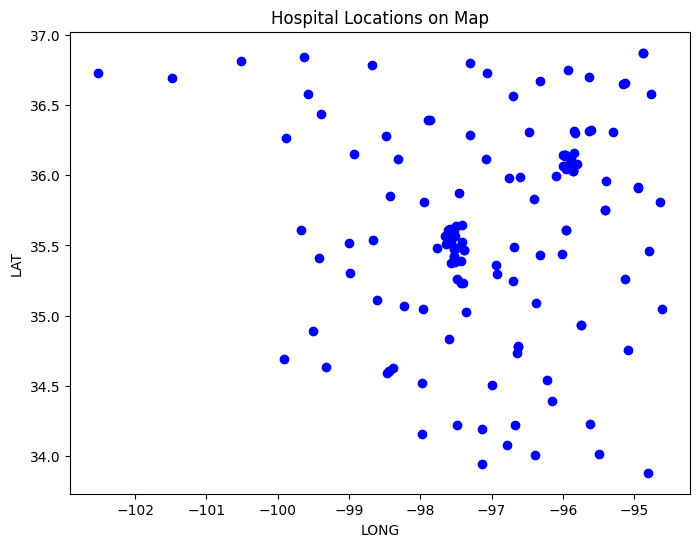

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(hospitals_df['LONG'], hospitals_df['LAT'], c='blue', marker='o')
plt.xlabel('LONG')
plt.ylabel('LAT')
plt.title('Hospital Locations on Map')
plt.show()

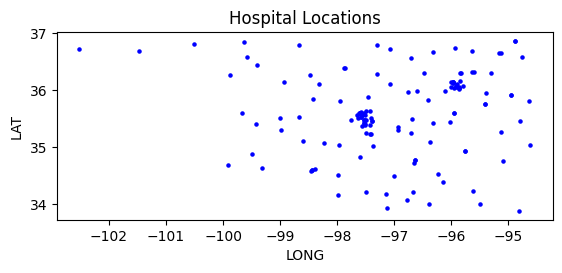

In [7]:

# using geopandas for spatial analysis
gdf = gpd.GeoDataFrame(hospitals_df, geometry=gpd.points_from_xy(hospitals_df['LONG'], hospitals_df['LAT']))

# Plot the locations of hospitals on a map
gdf.plot(marker='o', color='blue', markersize=5)
plt.title('Hospital Locations')
plt.xlabel('LONG')
plt.ylabel('LAT')
plt.show()


In [8]:
# Load the geographic data (FIPS)
geo_df = pd.read_csv(r"C:\Users\bye\OneDrive - County of San Mateo\Desktop\hospital parity study\OK fips geocoordinates.csv")
print("\nGeographic data shape:", geo_df.shape)
print(geo_df.head())
print(geo_df.info())
print(geo_df.columns)


Geographic data shape: (77, 10)
  USPS  GEOID  ANSICODE            NAME       ALAND    AWATER  ALAND_SQMI  \
0   OK  40001   1101788    Adair County  1486277939   8874158     573.855   
1   OK  40003   1101789  Alfalfa County  2244392665  38546676     866.565   
2   OK  40005   1101790    Atoka County  2526393964  37287777     975.446   
3   OK  40007   1101791   Beaver County  4700407527   7347161    1814.838   
4   OK  40009   1101792  Beckham County  2335338428   5514684     901.679   

   AWATER_SQMI   INTPTLAT  \
0        3.426  35.898043   
1       14.883  36.729703   
2       14.397  34.392469   
3        2.837  36.748334   
4        2.129  35.270601   

   INTPTLONG                                                                                                                 
0                                         -94.651026                                                                         
1                                         -98.323445                         

In [9]:
# Check the actual column names in your geo_df
print(geo_df.columns.tolist())

['USPS', 'GEOID', 'ANSICODE', 'NAME', 'ALAND', 'AWATER', 'ALAND_SQMI', 'AWATER_SQMI', 'INTPTLAT', 'INTPTLONG                                                                                                               ']


In [10]:
# Clean column names by stripping whitespace
geo_df.columns = [col.strip() for col in geo_df.columns]

# Now use the clean column names
gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(
    geo_df['INTPTLONG'], geo_df['INTPTLAT']))

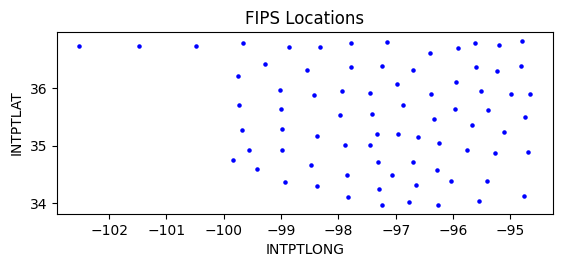

In [11]:
# using geopandas for spatial analysis
gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df['INTPTLONG'], geo_df['INTPTLAT']))

# Plot the locations of FIPS on a map
gdf.plot(marker='o', color='blue', markersize=5)
plt.title('FIPS Locations')
plt.xlabel('INTPTLONG')
plt.ylabel('INTPTLAT')
plt.show()

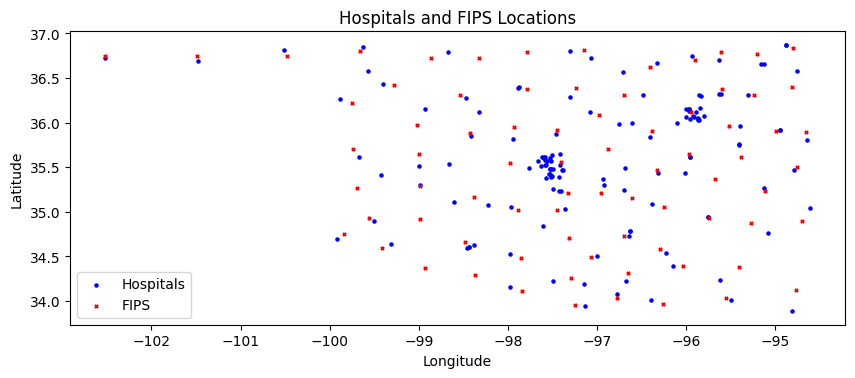

In [19]:
#add hopsitals and FIPS locations on the same map
import geopandas as gpd
import matplotlib.pyplot as plt

# Create GeoDataFrames
hospitals_gdf = gpd.GeoDataFrame(hospitals_df, geometry=gpd.points_from_xy(hospitals_df['LONG'], hospitals_df['LAT']))
fips_gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df['INTPTLONG'], geo_df['INTPTLAT']))

# Plot the points on the same figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot hospital locations in blue
hospitals_gdf.plot(ax=ax, marker='o', color='blue', markersize=5, label='Hospitals')

# Plot FIPS locations in red
fips_gdf.plot(ax=ax, marker='x', color='red', markersize=5, label='FIPS')

# Add title and labels
plt.title('Hospitals and FIPS Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend
plt.legend()

# Show plot
plt.show()


In [27]:
#Export to Shapefile
hospitals_gdf.to_file("hospitals.shp")
fips_gdf.to_file("fips.shp")

C:\Users\bye\AppData\Local\Temp\ipykernel_26400\1412173559.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  hospitals_gdf.to_file("hospitals.shp")
c:\Users\bye\OneDrive - County of San Mateo\Desktop\hospital parity study\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'CLEAN_COUNTY' to 'CLEAN_COUN'
  ogr_write(
C:\Users\bye\AppData\Local\Temp\ipykernel_26400\1412173559.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  fips_gdf.to_file("fips.shp")
c:\Users\bye\OneDrive - County of San Mateo\Desktop\hospital parity study\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'AWATER_SQMI' to 'AWATER_SQM'
  ogr_write(
c:\Users\bye\OneDrive - County of San Mateo\Desktop\hospital parity study\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'CLEAN_COU

SSLError: HTTPSConnectionPool(host='a.basemaps.cartocdn.com', port=443): Max retries exceeded with url: /light_all/7/27/49.png (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1010)')))

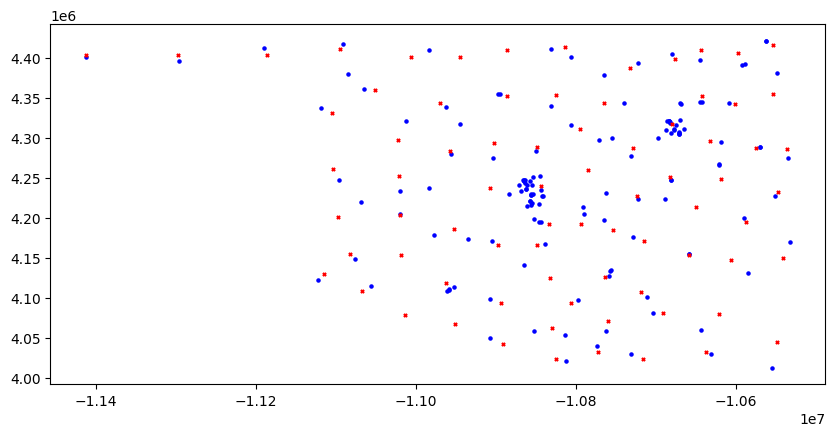

In [26]:
#Adding a Basemap with contextily
!pip install contextily
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Create GeoDataFrames
hospitals_gdf = gpd.GeoDataFrame(hospitals_df, 
                                 geometry=gpd.points_from_xy(hospitals_df['LONG'], hospitals_df['LAT']), 
                                 crs="EPSG:4326")

fips_gdf = gpd.GeoDataFrame(geo_df, 
                            geometry=gpd.points_from_xy(geo_df['INTPTLONG'], geo_df['INTPTLAT']), 
                            crs="EPSG:4326")

# Convert to Web Mercator for basemap compatibility
hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
fips_gdf = fips_gdf.to_crs(epsg=3857)

# Plot the points on a basemap
fig, ax = plt.subplots(figsize=(10, 6))

# Plot hospital locations in blue
hospitals_gdf.plot(ax=ax, marker='o', color='blue', markersize=5, label='Hospitals')

# Plot FIPS locations in red
fips_gdf.plot(ax=ax, marker='x', color='red', markersize=5, label='FIPS')

# Use OpenStreetMap basemap instead
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Add title and legend
plt.title('Hospitals and FIPS Locations with Basemap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()



In [12]:
#change county name to the consistent standard
print("Hospital county examples:")
print(hospitals_df['CNTYNAME'].head().tolist())

print("\nGeo county examples:")
print(geo_df['NAME'].head().tolist())

# Clean hospital data - Extract just the county name from "County, ST" format
def clean_hospital_county(county_string):
    if pd.isna(county_string):
        return None
    
    # Split by comma and take the first part (county name)
    parts = county_string.split(',')
    if len(parts) > 0:
        return parts[0].strip().upper()
    return county_string.upper()

# Clean geo data - Remove "County" suffix
def clean_geo_county(county_string):
    if pd.isna(county_string):
        return None
    
    # Remove "County" suffix if present
    return county_string.replace(' County', '').strip().upper()

# Apply cleaning to both datasets
hospitals_df['CLEAN_COUNTY'] = hospitals_df['CNTYNAME'].apply(clean_hospital_county)
geo_df['CLEAN_COUNTY'] = geo_df['NAME'].apply(clean_geo_county)
# Print examples of cleaned names
print("\nCleaned hospital counties:")
print(hospitals_df[['CNTYNAME', 'CLEAN_COUNTY']].head())

print("\nCleaned geo counties:")
print(geo_df[['NAME', 'CLEAN_COUNTY']].head())

# Now select representative counties using the cleaned names
rep_counties = hospitals_df['CLEAN_COUNTY'].value_counts().head(3).index
rep_hospitals_df = hospitals_df[hospitals_df['CLEAN_COUNTY'].isin(rep_counties)].copy()
rep_geo_df = geo_df[geo_df['CLEAN_COUNTY'].isin(rep_counties)].copy()

print("\nAfter cleaning:")
print("Representative hospital data shape:", rep_hospitals_df.shape)
print("Representative geographic data shape:", rep_geo_df.shape)


Hospital county examples:
['Pontotoc, OK', 'Tulsa, OK', 'Cleveland, OK', 'Pontotoc, OK', 'Oklahoma, OK']

Geo county examples:
['Adair County', 'Alfalfa County', 'Atoka County', 'Beaver County', 'Beckham County']

Cleaned hospital counties:
        CNTYNAME CLEAN_COUNTY
0   Pontotoc, OK     PONTOTOC
1      Tulsa, OK        TULSA
2  Cleveland, OK    CLEVELAND
3   Pontotoc, OK     PONTOTOC
4   Oklahoma, OK     OKLAHOMA

Cleaned geo counties:
             NAME CLEAN_COUNTY
0    Adair County        ADAIR
1  Alfalfa County      ALFALFA
2    Atoka County        ATOKA
3   Beaver County       BEAVER
4  Beckham County      BECKHAM

After cleaning:
Representative hospital data shape: (51, 12)
Representative geographic data shape: (3, 11)


In [13]:
# Verify the matching worked by showing counties in each dataset
print("\nRepresentative hospital counties:", rep_hospitals_df['CLEAN_COUNTY'].unique())
print("Representative geo counties:", rep_geo_df['CLEAN_COUNTY'].unique())



Representative hospital counties: ['TULSA' 'OKLAHOMA' 'COMANCHE']
Representative geo counties: ['COMANCHE' 'OKLAHOMA' 'TULSA']


In [14]:
# Create a representative subset for prototyping (e.g., 3 counties)
rep_counties = hospitals_df['CLEAN_COUNTY'].value_counts().head(3).index
rep_hospitals_df = hospitals_df[hospitals_df['CLEAN_COUNTY'].isin(rep_counties)].copy()
rep_geo_df = geo_df[geo_df['CLEAN_COUNTY'].isin(rep_counties)].copy()

print("\nRepresentative hospital data shape:", rep_hospitals_df.shape)
print("\nRepresentative geographic data shape:", rep_geo_df.shape)


Representative hospital data shape: (51, 12)

Representative geographic data shape: (3, 11)


In [15]:
# Step 2: Data Cleaning & Validation

# Check for missing values
print("\nMissing values in hospital data:")
print(hospitals_df.isna().sum())

print("\nMissing values in geographic data:")
print(geo_df.isna().sum())

# Clean hospital data
def clean_hospital_data(df):
    # Make a copy to avoid modifying original
    cleaned = df.copy()
    
    # Convert coordinates to float if they're not already
    cleaned['LAT'] = pd.to_numeric(cleaned['LAT'], errors='coerce')
    cleaned['LONG'] = pd.to_numeric(cleaned['LONG'], errors='coerce')
    
    # Standardize county names (uppercase for consistency)
    cleaned['CNTYNAME'] = cleaned['CNTYNAME'].str.upper()
    
    # Drop rows with missing critical data (coordinates)
    critical_cols = ['LAT', 'LONG', 'MNAME']
    cleaned = cleaned.dropna(subset=critical_cols)
    
    return cleaned

# Clean geographic data
def clean_geo_data(df):
    # Make a copy to avoid modifying original
    cleaned = df.copy()
    
    # Convert coordinates to float if they're not already
    cleaned['INTPTLAT'] = pd.to_numeric(cleaned['INTPTLAT'], errors='coerce')
    cleaned['INTPTLONG'] = pd.to_numeric(cleaned['INTPTLONG'], errors='coerce')
    
    # Standardize county names (uppercase for consistency)
    cleaned['NAME'] = cleaned['NAME'].str.upper()
    
    # Drop rows with missing critical data (coordinates)
    critical_cols = ['INTPTLAT', 'INTPTLONG', 'NAME']
    cleaned = cleaned.dropna(subset=critical_cols)
    
    return cleaned

# Apply cleaning to both full and representative datasets
clean_hospitals_df = clean_hospital_data(hospitals_df)
clean_geo_df = clean_geo_data(geo_df)
clean_rep_hospitals_df = clean_hospital_data(rep_hospitals_df)
clean_rep_geo_df = clean_geo_data(rep_geo_df)

print("\nCleaned hospital data shape:", clean_hospitals_df.shape)
print("Cleaned geographic data shape:", clean_geo_df.shape)


Missing values in hospital data:
ID              0
MNAME           0
CNTYNAME        0
MCRNUM          0
MLOCADDR        0
MLOCCITY        0
CNTRL           0
OBLEV           0
FCOUNTY         0
LAT             0
LONG            0
CLEAN_COUNTY    0
dtype: int64

Missing values in geographic data:
USPS            0
GEOID           0
ANSICODE        0
NAME            0
ALAND           0
AWATER          0
ALAND_SQMI      0
AWATER_SQMI     0
INTPTLAT        0
INTPTLONG       0
CLEAN_COUNTY    0
dtype: int64

Cleaned hospital data shape: (143, 12)
Cleaned geographic data shape: (77, 11)


In [16]:
# Step 3: Data Transformation

# Calculate distances between county center points and hospitals
def calculate_distances(hospital_df, geo_df):
    # Create a results dataframe to store distances
    results = []
    
    # For each county center point
    for _, county in geo_df.iterrows():
        county_coords = (county['INTPTLAT'], county['INTPTLONG'])
        county_name = county['NAME']
        
        # For each hospital
        for _, hospital in hospital_df.iterrows():
            hospital_coords = (hospital['LAT'], hospital['LONG'])
            distance_km = geodesic(county_coords, hospital_coords).kilometers
            
            results.append({
                'COUNTY': county_name,
                'HOSPITAL_ID': hospital['ID'],
                'HOSPITAL_NAME': hospital['MNAME'],
                'DISTANCE_KM': distance_km,
                'COUNTY_LAT': county['INTPTLAT'],
                'COUNTY_LONG': county['INTPTLONG'],
                'HOSPITAL_LAT': hospital['LAT'],
                'HOSPITAL_LONG': hospital['LONG']
            })
    
    return pd.DataFrame(results)

# Calculate distances for the representative dataset first
rep_distances_df = calculate_distances(clean_rep_hospitals_df, clean_rep_geo_df)
print("\nRepresentative distances data shape:", rep_distances_df.shape)
print(rep_distances_df.head())

# Find nearest hospital for each county
def find_nearest_hospitals(distances_df):
    # Group by county and find the minimum distance
    nearest = distances_df.loc[distances_df.groupby('COUNTY')['DISTANCE_KM'].idxmin()]
    return nearest

rep_nearest_df = find_nearest_hospitals(rep_distances_df)
print("\nNearest hospital for each county in representative data:")
print(rep_nearest_df[['COUNTY', 'HOSPITAL_NAME', 'DISTANCE_KM']])


Representative distances data shape:

 (153, 8)
            COUNTY  HOSPITAL_ID  \
0  COMANCHE COUNTY      6730005   
1  COMANCHE COUNTY      6730012   
2  COMANCHE COUNTY      6730013   
3  COMANCHE COUNTY      6730014   
4  COMANCHE COUNTY      6730019   

                                    HOSPITAL_NAME  DISTANCE_KM  COUNTY_LAT  \
0            Southwestern Regional Medical Center   283.110022    34.66263   
1               Curahealth Hospital Oklahoma City   126.282996    34.66263   
2  Post Acute Medical Specialty Hospital of Tulsa   284.868278    34.66263   
3                     Northwest Surgical Hospital   129.938537    34.66263   
4         Select Specialty Hospital-Tulsa Midtown   281.023901    34.66263   

   COUNTY_LONG  HOSPITAL_LAT  HOSPITAL_LONG  
0   -98.476612       36.0515       -95.8633  
1   -98.476612       35.4828       -97.5165  
2   -98.476612       36.1147       -95.8905  
3   -98.476612       35.5641       -97.5666  
4   -98.476612       36.1473       -95.9698  

Nearest hospital for each county 

In [17]:
# Step 4: Data Storage
def setup_database(db_name="hospital_distance_analysis.db"):
    # Connect to SQLite database (creates if it doesn't exist)
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    
    # Create tables
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS hospitals (
        id INTEGER PRIMARY KEY,
        name TEXT,
        county TEXT,
        address TEXT,
        city TEXT,
        control TEXT,
        obstetrician_level TEXT,
        latitude REAL,
        longitude REAL
    )
    ''')
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS counties (
        geoid TEXT PRIMARY KEY,
        name TEXT,
        land_area_sqmi REAL,
        water_area_sqmi REAL,
        latitude REAL,
        longitude REAL
    )
    ''')
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS distances (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        county_name TEXT,
        hospital_id INTEGER,
        distance_km REAL,
        FOREIGN KEY (hospital_id) REFERENCES hospitals(id),
        FOREIGN KEY (county_name) REFERENCES counties(name)
    )
    ''')
    
    conn.commit()
    return conn

# Store data in database
def store_data(conn, hospitals_df, geo_df, distances_df):
    # Store hospitals
    hospitals_subset = hospitals_df[['ID', 'MNAME', 'CNTYNAME', 'MLOCADDR', 'MLOCCITY', 
                                    'CNTRL', 'OBLEV', 'LAT', 'LONG']]
    hospitals_subset.to_sql('hospitals', conn, if_exists='replace', index=False,
                          dtype={'ID': 'INTEGER PRIMARY KEY'})
    
    # Store counties
    counties_subset = geo_df[['GEOID', 'NAME', 'ALAND_SQMI', 'AWATER_SQMI', 
                             'INTPTLAT', 'INTPTLONG']]
    counties_subset.to_sql('counties', conn, if_exists='replace', index=False,
                         dtype={'GEOID': 'TEXT PRIMARY KEY'})
    
    # Store distances
    distances_subset = distances_df[['COUNTY', 'HOSPITAL_ID', 'DISTANCE_KM']]
    distances_subset.to_sql('distances', conn, if_exists='replace', index=False)
    
    print("Data successfully stored in database")

# Set up database and store representative data
conn = setup_database()
store_data(conn, clean_rep_hospitals_df, clean_rep_geo_df, rep_distances_df)


Data successfully stored in database


In [18]:
# Step 5: Analysis & Visualization
def analyze_hospital_access(conn):
    # Query to find average distance to hospitals by county
    query = '''
    SELECT 
        d.county_name,
        COUNT(DISTINCT d.hospital_id) as num_hospitals,
        MIN(d.distance_km) as min_distance_km,
        AVG(d.distance_km) as avg_distance_km,
        MAX(d.distance_km) as max_distance_km
    FROM distances d
    GROUP BY d.county_name
    ORDER BY avg_distance_km DESC
    '''
    
    results = pd.read_sql_query(query, conn)
    print("\nHospital Access Analysis by County:")
    print(results)
    
    # Create visualizations
    plt.figure(figsize=(12, 6))
    
    # Plot average distances
    sns.barplot(x='county_name', y='avg_distance_km', data=results)
    plt.title('Average Distance to Maternal Hospitals by County')
    plt.xlabel('County')
    plt.ylabel('Average Distance (km)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('avg_hospital_distance_by_county.png')
    
    return results

# Run analysis on representative data
access_analysis = analyze_hospital_access(conn)

# Create a map visualization
def create_hospital_map(hospitals_df, geo_df, nearest_df):
    # Create a map centered on Oklahoma
    map_center = [hospitals_df['LAT'].mean(), hospitals_df['LONG'].mean()]
    m = folium.Map(location=map_center, zoom_start=7)
    
    # Add hospitals as markers
    for _, hospital in hospitals_df.iterrows():
        folium.Marker(
            location=[hospital['LAT'], hospital['LONG']],
            popup=hospital['MNAME'],
            icon=folium.Icon(color='red', icon='plus', prefix='fa')
        ).add_to(m)
    
    # Add county centers
    for _, county in geo_df.iterrows():
        folium.Marker(
            location=[county['INTPTLAT'], county['INTPTLONG']],
            popup=county['NAME'],
            icon=folium.Icon(color='blue', icon='info', prefix='fa')
        ).add_to(m)
    
    # Add lines connecting counties to their nearest hospital
    for _, row in nearest_df.iterrows():
        folium.PolyLine(
            locations=[[row['COUNTY_LAT'], row['COUNTY_LONG']], 
                      [row['HOSPITAL_LAT'], row['HOSPITAL_LONG']]],
            color='green',
            weight=2,
            opacity=0.7,
            popup=f"{row['COUNTY']} to {row['HOSPITAL_NAME']}: {row['DISTANCE_KM']:.2f} km"
        ).add_to(m)
    
    m.save('hospital_distance_map.html')
    print("Map saved as hospital_distance_map.html")

# Create map for representative data
create_hospital_map(clean_rep_hospitals_df, clean_rep_geo_df, rep_nearest_df)

# Close the database connection
conn.close()

DatabaseError: Execution failed on sql '
    SELECT 
        d.county_name,
        COUNT(DISTINCT d.hospital_id) as num_hospitals,
        MIN(d.distance_km) as min_distance_km,
        AVG(d.distance_km) as avg_distance_km,
        MAX(d.distance_km) as max_distance_km
    FROM distances d
    GROUP BY d.county_name
    ORDER BY avg_distance_km DESC
    ': no such column: d.county_name